#### 연령별 인구현황
    - https://jumin.mois.go.kr/ageStatMonth.do#none
    - 2025년 1월 기준

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글설정
plt.rcParams["font.family"] = "Malgun Gothic"
# -설정
plt.rcParams["axes.unicode_minus"] = False
import warnings
warnings.simplefilter(action="ignore")



#### 데이터 로드

In [16]:
# 엑셀 데이터 로드

df = pd.read_excel("./resources/연령별인구현황_월간.xlsx",skiprows=3,engine="openpyxl")
df

,행정기관코드,행정기관,남 인구수,연령구간인구수,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
0,0,전국,"25,492,996","25,492,996","648,339","950,546","1,191,717","1,182,489","1,363,617","1,722,639",...,"2,133,752","2,098,885","1,869,039","1,281,323","990,687","811,449","516,190","206,306","49,439","7,098"
1,1100000000,서울특별시,"4,504,432","4,504,432","103,671","143,277","180,752","187,565","246,025","366,969",...,"363,193","358,833","338,782","238,580","188,642","135,510","76,340","29,023","7,444","1,142"
2,2600000000,부산광역시,"1,588,357","1,588,357","36,341","56,068","69,500","65,399","82,369","99,722",...,"139,082","149,531","147,649","106,324","79,669","59,312","32,903","11,872","2,849",373
3,2700000000,대구광역시,"1,159,235","1,159,235","28,056","44,543","54,815","54,625","65,201","74,854",...,"107,534","104,572","91,564","65,987","49,086","39,977","23,973","8,878","1,896",225
4,2800000000,인천광역시,"1,510,615","1,510,615","41,546","58,028","70,917","69,016","78,273","102,569",...,"129,504","127,755","105,701","65,110","49,649","38,022","24,411","10,217","2,640",420
5,2900000000,광주광역시,"694,532","694,532","18,246","28,729","37,053","37,879","43,976","50,356",...,"59,151","53,719","45,612","31,546","26,361","19,528","11,517","4,719","1,151",161
6,3000000000,대전광역시,"717,162","717,162","19,740","27,067","34,385","35,411","44,871","55,711",...,"59,605","56,700","49,679","33,162","24,444","19,241","12,099","4,785","1,167",183
7,3100000000,울산광역시,"564,893","564,893","14,189","22,983","28,980","27,892","29,116","37,989",...,"51,717","47,525","39,370","24,556","15,668","11,780","6,798","2,651",618,78
8,3600000000,세종특별자치시,"194,470","194,470","8,118","12,718","14,676","12,057","9,231","9,512",...,"11,848","10,572","8,874","5,555","3,819","3,140","2,175","1,052",265,35
9,4100000000,경기도,"6,884,215","6,884,215","197,785","280,682","342,063","332,420","370,803","479,170",...,"567,751","525,335","433,615","276,480","212,186","167,860","106,262","42,523","10,791","1,525"


In [38]:
# 남자 데이터 로드
df_man = pd.read_excel("./resources/연령별인구현황_월간.xlsx",skiprows=3,engine="openpyxl",usecols="B,E:Y",index_col="행정기관")
df_man.head(3)

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"648,339","950,546","1,191,717","1,182,489","1,363,617","1,722,639","1,833,053","1,621,988","1,970,544","1,948,862",...,"2,147,892","2,084,369","1,768,242","1,141,322","806,758","529,142","252,280","67,740","11,150","1,535"
서울특별시,"103,671","143,277","180,752","187,565","246,025","366,969","399,672","322,369","350,899","332,453",...,"348,896","331,943","295,342","202,243","150,279","100,354","44,943","11,630","2,195",341
부산광역시,"36,341","56,068","69,500","65,399","82,369","99,722","106,133","94,394","119,822","117,689",...,"129,933","134,481","128,131","90,753","62,671","40,218","16,741","3,910",596,60


In [15]:
# 여자 데이터 로드
df_woman = pd.read_excel("./resources/연령별인구현황_월간.xlsx",skiprows=3,engine="openpyxl",usecols="B,Z:AV",index_col="행정기관")
df_woman.head(3)

,여 인구수,연령구간인구수.1,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"25,714,878","25,714,878","618,373","902,791","1,131,899","1,114,571","1,263,569","1,580,523","1,646,810","1,515,801",...,"2,133,752","2,098,885","1,869,039","1,281,323","990,687","811,449","516,190","206,306","49,439","7,098"
서울특별시,"4,826,226","4,826,226","98,759","135,737","171,242","180,641","280,249","409,571","397,336","322,954",...,"363,193","358,833","338,782","238,580","188,642","135,510","76,340","29,023","7,444","1,142"
부산광역시,"1,675,534","1,675,534","34,355","53,618","66,076","62,070","79,296","95,040","98,024","89,752",...,"139,082","149,531","147,649","106,324","79,669","59,312","32,903","11,872","2,849",373


#### 데이터 탐색

In [17]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   여 인구수      18 non-null     object
 1   연령구간인구수.1  18 non-null     object
 2   0~4세.1     18 non-null     object
 3   5~9세.1     18 non-null     object
 4   10~14세.1   18 non-null     object
 5   15~19세.1   18 non-null     object
 6   20~24세.1   18 non-null     object
 7   25~29세.1   18 non-null     object
 8   30~34세.1   18 non-null     object
 9   35~39세.1   18 non-null     object
 10  40~44세.1   18 non-null     object
 11  45~49세.1   18 non-null     object
 12  50~54세.1   18 non-null     object
 13  55~59세.1   18 non-null     object
 14  60~64세.1   18 non-null     object
 15  65~69세.1   18 non-null     object
 16  70~74세.1   18 non-null     object
 17  75~79세.1   18 non-null     object
 18  80~84세.1   18 non-null     object
 19  85~89세.1   18 non-null     object
 20  90~94세.1   18 non-null     ob

In [18]:
# , 제거 
data = {
    "name":["홍길동","김수정","이민정"],
    "age":["25","35","45"]
}
sample_df = pd.DataFrame(data)
sample_df

,name,age
0,홍길동,25
1,김수정,35
2,이민정,45


In [19]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [22]:
# age object => int64 변경
# astype("변경할타입") : NaN 을 가지고 있는 데이터가 있으면 에러 발생
# pd.to_numeric(변경할 컬럼)

sample_df["age_1"]= sample_df["age"].astype("int64")
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      object
 2   age_1   3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [25]:
sample_df.loc[1,'age'] = np.nan
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     2 non-null      object
 2   age_1   3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [28]:
# sample_df["age_2"]= sample_df["age"].astype("int64")
sample_df["age_2"] = pd.to_numeric(sample_df["age"])
sample_df

,name,age,age_1,age_2
0,홍길동,25,25,25.0
1,김수정,NaN,35,NaN
2,이민정,45,45,45.0


In [30]:
df_man["10~14세.1"].str.replace(",","").astype("int64")

행정기관
전국           1131899
서울특별시         171242
부산광역시          66076
대구광역시          52430
인천광역시          67383
광주광역시          35044
대전광역시          32390
울산광역시          27203
세종특별자치시        13928
경기도           327881
강원특별자치도        30190
충청북도           35110
충청남도           49387
전북특별자치도        38455
전라남도           38231
경상북도           51937
경상남도           77294
제주특별자치도        17718
Name: 10~14세.1, dtype: int64

In [39]:
df_man = df_man.apply(lambda x:x.str.replace(",","").astype("int64"))
df_man.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0~4세     18 non-null     int64
 1   5~9세     18 non-null     int64
 2   10~14세   18 non-null     int64
 3   15~19세   18 non-null     int64
 4   20~24세   18 non-null     int64
 5   25~29세   18 non-null     int64
 6   30~34세   18 non-null     int64
 7   35~39세   18 non-null     int64
 8   40~44세   18 non-null     int64
 9   45~49세   18 non-null     int64
 10  50~54세   18 non-null     int64
 11  55~59세   18 non-null     int64
 12  60~64세   18 non-null     int64
 13  65~69세   18 non-null     int64
 14  70~74세   18 non-null     int64
 15  75~79세   18 non-null     int64
 16  80~84세   18 non-null     int64
 17  85~89세   18 non-null     int64
 18  90~94세   18 non-null     int64
 19  95~99세   18 non-null     int64
 20  100세 이상  18 non-null     int64
dtypes: int64(21)
memory usage: 3.1+ KB


In [33]:
df_woman = df_woman.apply(lambda x:x.str.replace(",","").astype("int64"))
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   여 인구수      18 non-null     int64
 1   연령구간인구수.1  18 non-null     int64
 2   0~4세.1     18 non-null     int64
 3   5~9세.1     18 non-null     int64
 4   10~14세.1   18 non-null     int64
 5   15~19세.1   18 non-null     int64
 6   20~24세.1   18 non-null     int64
 7   25~29세.1   18 non-null     int64
 8   30~34세.1   18 non-null     int64
 9   35~39세.1   18 non-null     int64
 10  40~44세.1   18 non-null     int64
 11  45~49세.1   18 non-null     int64
 12  50~54세.1   18 non-null     int64
 13  55~59세.1   18 non-null     int64
 14  60~64세.1   18 non-null     int64
 15  65~69세.1   18 non-null     int64
 16  70~74세.1   18 non-null     int64
 17  75~79세.1   18 non-null     int64
 18  80~84세.1   18 non-null     int64
 19  85~89세.1   18 non-null     int64
 20  90~94세.1   18 non-null     int64
 21  95~99세.1   18

In [46]:
df_man.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object')

In [45]:
df_woman.columns

Index(['여 인구수', '연령구간인구수.1', '0~4세.1', '5~9세.1', '10~14세.1', '15~19세.1',
       '20~24세.1', '25~29세.1', '30~34세.1', '35~39세.1', '40~44세.1', '45~49세.1',
       '50~54세.1', '55~59세.1', '60~64세.1', '65~69세.1', '70~74세.1', '75~79세.1',
       '80~84세.1', '85~89세.1', '90~94세.1', '95~99세.1', '100세 이상.1'],
      dtype='object')

In [52]:
# 남자,여자 컬럼명 동일하게 변경 
# 변경할 컬럼명이 일부인 경우
# rename(columns={"변경전":"변경후"})
# 변경할 컬럼명이 전체인 경우
# df_woman.columns = ["변경할 컬럼명 나열"]

df_woman.columns = df_man.columns

ValueError: Length mismatch: Expected axis has 23 elements, new values have 21 elements

#### 데이터 시각화

In [49]:
df_man.head()

# df_man.iloc[행,열] : index 값으로 접근
# df_man.loc[행,열] : 이름으로 접근

# 전국 데이터 접근
df_man.iloc[0]// 10000

0~4세        64
5~9세        95
10~14세     119
15~19세     118
20~24세     136
25~29세     172
30~34세     183
35~39세     162
40~44세     197
45~49세     194
50~54세     224
55~59세     214
60~64세     208
65~69세     176
70~74세     114
75~79세      80
80~84세      52
85~89세      25
90~94세       6
95~99세       1
100세 이상      0
Name: 전국  , dtype: int64

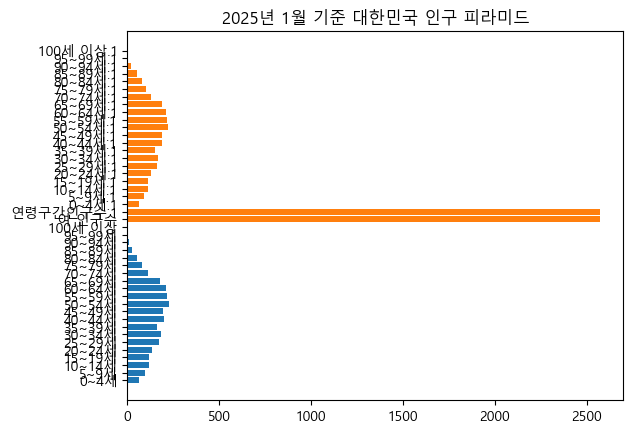

In [50]:
plt.barh(y=df_man.columns,width=df_man.iloc[0] // 10000)
plt.barh(y=df_woman.columns,width=df_woman.iloc[0] // 10000)
g= plt.title("2025년 1월 기준 대한민국 인구 피라미드")